In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import DateOffset

Retrieved full list of S&P 500 stocks from Wikipedia (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) and saved file as CSV. Read in the file and selected the desired columns which includes the ticker of Symbol, Security, and GICS Sector. Have a total of 503 Tickers.

In [ ]:
path_sp = r"C:\Users\tokud\Projects\Stocks\S&P 500\SP500_Tickers.csv"

sp500_df = pd.read_csv(path_sp, dtype='str',encoding='us-ascii',encoding_errors='ignore')
df_security = sp500_df[['Symbol', 'Security', 'GICSSector']].copy()
df_security['Symbol'] = df_security['Symbol'].str.replace('.', '-')

print(df_security.shape)
df_security.head()

(503, 3)


,Symbol,Security,GICSSector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


Read in saved file which includes the closing prices for all 503 stocks over the past 5 years, ranging from 11-27-2020 to 11-25-2025.  Pulled from yfinance library and includes 1255 total trading days. Making the trading date the index of the dataset.

In [ ]:
path = r"C:\Users\tokud\Projects\Stocks\S&P 500\sp500_close_data.csv"

df = pd.read_csv(path,
                 index_col="Date",
                 parse_dates=True
                 )
print(df.shape)
df.head() ## Printing first 5 rows

(1255, 503)


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-27,110.278610,113.494804,86.311806,NaN,98.325989,31.408176,232.809189,477.029999,126.117790,43.888615,...,23.553703,98.384682,57.761559,32.847702,91.647942,212.520004,98.106224,139.959686,377.000000,154.373764
2020-11-30,112.994736,115.889488,86.056709,NaN,98.874176,30.618933,231.850464,478.470001,127.335518,43.297058,...,23.824440,97.684853,57.539467,31.164036,90.544106,210.960007,96.843048,139.120026,378.420013,153.331711
2020-12-01,111.506203,119.462067,85.612366,NaN,99.120857,31.398670,234.810410,479.149994,128.846176,43.592838,...,24.013128,99.492760,58.436398,31.466440,91.581902,203.000000,97.337334,136.302567,372.170013,154.268600
2020-12-02,110.742561,119.812515,86.394112,NaN,98.810219,31.484251,232.381042,481.260010,128.782120,43.053471,...,23.701378,102.185158,58.667011,32.643368,90.704475,202.000000,96.092476,137.935181,367.209991,151.964523
2020-12-03,109.785652,119.676224,86.188385,NaN,98.243759,30.989782,232.632324,484.279999,128.515381,43.331848,...,24.336826,105.451057,57.496742,32.864040,91.279991,205.529999,95.671425,136.498459,372.369995,150.167191


In [6]:
df.tail() ## Printing last 5 rows

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-19,144.399994,268.559998,232.910004,114.440002,126.150002,91.169998,241.080002,318.109985,232.199997,58.230000,...,21.350000,118.320000,79.669998,117.349998,138.588043,62.000000,148.320007,89.449997,230.929993,117.080002
2025-11-20,145.059998,266.250000,229.449997,111.540001,123.970001,91.879997,240.789993,312.399994,225.199997,57.869999,...,21.370001,117.139999,79.489998,117.019997,137.650681,61.950001,149.210007,89.070000,228.399994,115.889999
2025-11-21,151.250000,271.489990,236.279999,114.260002,128.110001,92.459999,251.850006,324.190002,232.320007,58.630001,...,21.780001,119.599998,79.669998,117.080002,139.994064,61.950001,152.979996,92.180000,240.949997,122.059998
2025-11-24,153.600006,275.920013,229.509995,114.410004,127.190002,91.940002,243.619995,318.730011,239.399994,58.650002,...,21.510000,123.239998,80.260002,115.970001,141.430008,61.860001,151.080002,93.519997,242.449997,122.870003
2025-11-25,157.199997,276.970001,231.800003,118.559998,128.050003,93.610001,249.229996,319.549988,252.020004,59.700001,...,22.139999,127.470001,80.389999,114.510002,141.509995,63.689999,154.000000,97.070000,249.309998,127.889999


Various functions used to transform, merge, and slice data. First one checks for nulls in the dataset as not all of the stocks have closing prices going back 5 years.

The second function completes a left join on the S&P 500 data from Wikipedia, so I have the Security and GICS Sector info tied to my closing prices from yfinance. 

Third function creates numerous subsets of data broken down into windows of time (e.g., 5year, 3year, 1year, 6months, etc.)

The fourth function initiates a quantitative analysis on the pricing data subsets. First it creates the logarithmic returns on the closing price data, then calculates the total returns for the given time period, calculates the votatlity, Sharpe Ratio, and finally calculates the drawdowns. A dictionary of dataframes are return with the key being the window of time and the value being the individual dataframes. 

The fifth function returns a priority list of stocks after comparing the stocks with the highest returns with the stocks with the highest Sharpe Ratios, while only keeping the stocks that appear in the Sharpe Ratio list. Then this remaining set is compared to stocks with the highest volatilities and worst drawdowns and if the ticker appears anywhere in these sets to drop them. The objective is to keep the stocks with the lowest risk and highest returns.

Finally my last function creates line plots by calculating the logarithmic returns and cummulative logarithmic returns and matching them with the indexes of the most extreme top 10 returns, Sharpe Ratios, Top & Bottom Volatilities, and Max Drawdowns. 

In [34]:

def check_for_nulls(dataframe):
    null_df = dataframe.isnull().sum()
    null_idx = null_df[null_df > 0].index
    null_tickers_df = dataframe[null_idx]
    
    return null_tickers_df


def merge_dataframes(df):
    df_t = pd.DataFrame(df).reset_index()
    df_m = pd.merge(df_t, df_security, how='left', left_on='index', right_on='Symbol')
    df_r = df_m.rename(columns={0: 'Metric'}).set_index('index')
    
    return df_r


def create_time_subsets(df):
    
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.copy()
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        
    latest = df.index.max()
    
    return {
        "5year": df.copy(),
        "4year": df.loc[df.index >= latest - DateOffset(years=4)],
        "3year": df.loc[df.index >= latest - DateOffset(years=3)],
        "2year": df.loc[df.index >= latest - DateOffset(years=2)],
        "1year": df.loc[df.index >= latest - DateOffset(years=1)],
        "9month": df.loc[df.index >= latest - DateOffset(months=9)],
        "6month": df.loc[df.index >= latest - DateOffset(months=6)],
        "3month": df.loc[df.index >= latest - DateOffset(months=3)],
        "1month": df.loc[df.index >= latest - DateOffset(months=1)],
    }
    

def eda_stock_analysis(df, label="Period", n_top=50, vol_threshold=0.25, dd_threshold=-0.5):
    
    log_returns = np.log(df / df.shift(1))
    
    # Total Return Calculation
    total_return = (df.iloc[-1] / df.iloc[0] - 1).sort_values()
    
    total_return_sort = total_return.sort_values(ascending=False).head(n_top)
    total_return_df = merge_dataframes(total_return_sort)
    
    
    # Volatility Calculation
    volatility = log_returns.std() * np.sqrt(252)
    vol_sorted = volatility.sort_values()

    # Most and Least Volatile Stocks
    vol_sorted_top = vol_sorted.sort_values(ascending=False)
    vol_sorted_df = merge_dataframes(vol_sorted_top)
    vol_sorted_filter = vol_sorted_df[vol_sorted_df['Metric'] >= vol_threshold].copy()
    
    vol_sorted_bottom = vol_sorted.sort_values(ascending=False).tail(n_top)
    vol_bottom_df = merge_dataframes(vol_sorted_bottom)
    vol_bottom_df = vol_bottom_df.sort_values(by='Metric')
    
    # Sharpe Ratio Calculation
    rf = 0.04 # risk free rate

    mean_returns = log_returns.mean() * 252
    sharpe = (mean_returns - rf) / volatility
  
    sharpe_df = sharpe.sort_values(ascending=False).head(n_top)
    sharpe_df = merge_dataframes(sharpe_df)
    
    # Drawdown Calculation

    roll_max = df.cummax()
    drawdowns = (df - roll_max) / roll_max

    max_drawdown = drawdowns.min()
    
    max_drawdown_sort = max_drawdown.sort_values()
    max_drawdown_df = merge_dataframes(max_drawdown_sort)
    max_drawdown_filter = max_drawdown_df[max_drawdown_df['Metric'] <= dd_threshold].copy()
    
    print(f"EDA Complete for {label}")

    return    {'total_return': total_return_df,
        'volatility_top': vol_sorted_filter,
        'volatility_bottom': vol_bottom_df,
        'sharpe_top': sharpe_df,
        'max_drawdown': max_drawdown_filter,
        'volatility_og': vol_sorted_df,
        'max_drawdown_og': max_drawdown_df
        }  


def filter_priority_stocks(d_returns, d_sharpe, d_drawdown, d_vol):
    returns_set = set(d_returns['Symbol'])
    sharpe_set = set(d_sharpe['Symbol'])
    drawdown_set = set(d_drawdown['Symbol'])
    volatility_set = set(d_vol['Symbol'])
    
    priority = returns_set & sharpe_set
    exclude = drawdown_set | volatility_set
    
    final = priority - exclude
    return d_returns[d_returns['Symbol'].isin(final)]


def stock_analysis_plots(df, label="Period", n_top=10):
    log_returns = np.log(df / df.shift(1))
    cum_log_returns = log_returns.cumsum()
    
    # Total Return Calculation
    total_return = (df.iloc[-1] / df.iloc[0] - 1).sort_values()
    top = total_return.nlargest(n_top).index

    cum_log_returns[top].plot(title=f"Top {n_top} Returns ({label})", figsize=(10,6))
    
     # Volatility Calculation
    volatility = log_returns.std() * np.sqrt(252)
    vol_sorted = volatility.sort_values()

    # Most and Least Volatile Stocks
    top_vol = vol_sorted.nlargest(n_top).index
    cum_log_returns[top_vol].plot(title=f'Top {n_top} Most Volatile ({label})', figsize=(10,6))
    
    bottom_vol = vol_sorted.nsmallest(n_top).index
    cum_log_returns[bottom_vol].plot(title=f'Top {n_top} Least Volatile ({label})', figsize=(10,6))
    
    # Sharpe Ratio Calculation
    rf = 0.04 # risk free rate

    mean_returns = log_returns.mean() * 252
    sharpe = (mean_returns - rf) / volatility

    top_sharpe = sharpe.sort_values(ascending=False).head(n_top).index

    cum_log_returns[top_sharpe].plot(figsize=(10, 6), title=f"Top {n_top} Sharpe Ratio Stocks ({label})")
    
      # Drawdown Calculation

    roll_max = df.cummax()
    drawdowns = (df - roll_max) / roll_max

    max_drawdown = drawdowns.min()

    worst_dd = max_drawdown.sort_values().head(n_top).index
    cum_log_returns[worst_dd].plot(figsize=(10, 6), title=f"Worst {n_top} Drawdowns ({label})")
    

Checking for nulls in the S&P 500 data and verify that 17 stocks do not include closing prices for all 5 years. 

In [8]:
df_nulls = check_for_nulls(df)
print(df_nulls.shape)
df_nulls.head()

(1255, 17)


,ABNB,APP,BF.B,BRK.B,CEG,COIN,DASH,EXE,FISV,GEHC,GEV,HOOD,KVUE,Q,SOLS,SOLV,VLTO
Date,,,,,,,,,,,,,,,,,
2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.529999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.790001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.519997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BF.B and BRK.B have no data whatsoever and appear to no longer be active on the S&P 500. The rest have a wide range of missing closing prices but are active. A separate analysis can be done on these but for now I am going to simply analyze stocks with a full 5 years of data.

In [9]:
df_nulls.isnull().sum()

ABNB        9
APP        94
BF.B     1255
BRK.B    1255
CEG       287
COIN       93
DASH        8
EXE        50
FISV        1
GEHC      516
GEV       836
HOOD      167
KVUE      611
Q        1233
SOLS     1228
SOLV      835
VLTO      716
dtype: int64

Dropping columns with nulls results in a total of 486 stocks to work with.

In [10]:
df_clean = df.dropna(axis=1, how='any')
df_clean.shape

(1255, 486)

Running function below to create my window of time subsets of closing price data.

In [12]:
subsets = create_time_subsets(df_clean)

for key, subset in subsets.items():
    print(f"{key}:" f" {subset.shape}")

5year: (1255, 486)
4year: (1004, 486)
3year: (753, 486)
2year: (502, 486)
1year: (251, 486)
9month: (191, 486)
6month: (128, 486)
3month: (66, 486)
1month: (22, 486)


Run for loop on subsets of data and complete individual stock analysis on each window of time. Results are saved into empty analysis dictionary. 

In [13]:
analysis = {}

for label, subset_df in subsets.items():
    print(f"\nRunning EDA for {label} ({subset_df.shape[0]} trading days)")
    analysis[label] = eda_stock_analysis(subset_df, label=label)


Running EDA for 5year (1255 trading days)
EDA Complete for 5year

Running EDA for 4year (1004 trading days)
EDA Complete for 4year

Running EDA for 3year (753 trading days)
EDA Complete for 3year

Running EDA for 2year (502 trading days)
EDA Complete for 2year

Running EDA for 1year (251 trading days)
EDA Complete for 1year

Running EDA for 9month (191 trading days)
EDA Complete for 9month

Running EDA for 6month (128 trading days)
EDA Complete for 6month

Running EDA for 3month (66 trading days)
EDA Complete for 3month

Running EDA for 1month (22 trading days)
EDA Complete for 1month


The dictionary should include 9 keys (9 windows of time) and 7 subkeys (returned dataframes), which would be a total of 63 dataframes.

Using for loop below to extra the dataframes out of my dictionary and appending to a list, concatenating it, and turning it to a combined dataframe. Adding two new columns which designate the timeframe it belongs to and the metric type.  

Take a look at those insane returns for the first 5 ranked stocks. Nvidia for example had a 1,245% return in 5 years. 

In [17]:
results_list = []

for key, value in analysis.items():
    for subkey, subvalue in value.items():
        data = analysis[key][subkey]
        data['Timeframe'] = key
        data['Metric Type'] = subkey
        results_list.append(data)
        
df_results = pd.concat(results_list)
print(df_results.shape)
df_results.head()   

(13363, 6)


,Metric,Symbol,Security,GICSSector,Timeframe,Metric Type
index,,,,,,
NVDA,12.449924,NVDA,Nvidia,Information Technology,5year,total_return
SMCI,9.954469,SMCI,Supermicro,Information Technology,5year,total_return
AVGO,9.908226,AVGO,Broadcom,Information Technology,5year,total_return
VST,8.756304,VST,Vistra Corp.,Utilities,5year,total_return
HWM,7.392950,HWM,Howmet Aerospace,Industrials,5year,total_return


Filtering out the least volatile stocks for this analysis. May return to them latter. 

In [18]:
df_results_filtered = df_results[~(df_results['Metric Type'] == 'volatility_bottom')]
print(df_results_filtered.shape)

(12913, 6)


Running the loop below on a list of the individual timeframes to create indvidual subsets of data filtered by timeframe and metric type. These slices of data will be used as arguments in my filter_priority_stocks function. The function as mentioned earlier will compare the total returns with the stocks in the Sharpe Ratio list and only keep the stocks that are also present in the Sharpe Ratio list. 

Then that slice of data will be compared to the high volatility and max drawdown dataframes and if the stock is found in those sets, the stocks will be dropped and will return a final dataframe of prioritized stocks. 

Finally this prioritized list of stocks will merge with the volatility, drawdown, Sharpe Ratio metrics associated with the ticker. 

In [21]:
final_results_list = []

timeframe_list = df_results_filtered['Timeframe'].unique().tolist()

for i in timeframe_list:
    df_range_returns = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'total_return')]
    df_range_sharpe = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'sharpe_top')]
    df_range_drawdown = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'max_drawdown')]
    df_range_volatility = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'volatility_top')]
    
    df_range_volatility_og = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'volatility_og')]
    df_range_drawdown_og = df_results_filtered[(df_results_filtered['Timeframe'] == i) & (df_results_filtered['Metric Type'] == 'max_drawdown_og')]
    
    df_final = filter_priority_stocks(df_range_returns, df_range_sharpe, df_range_drawdown, df_range_volatility)
    
    df_final = pd.merge(df_final, df_range_volatility_og[['Symbol', 'Metric']], how='left', on='Symbol', suffixes=('', '_volatility'))
    df_final = pd.merge(df_final, df_range_drawdown_og[['Symbol', 'Metric']], how='left', on='Symbol', suffixes=('', '_drawdown'))
    df_final = pd.merge(df_final, df_range_sharpe[['Symbol', 'Metric']], how='left', on='Symbol', suffixes=('', '_sharpe_ratio'))
    
    final_results_list.append(df_final)
    
final_results = pd.concat(final_results_list).reset_index(drop=True)
print(final_results.shape)
final_results
        

(50, 9)


,Metric,Symbol,Security,GICSSector,Timeframe,Metric Type,Metric_volatility,Metric_drawdown,Metric_sharpe_ratio
0,4.096861,MCK,McKesson Corporation,Health Care,5year,total_return,0.229262,-0.239074,1.253082
1,3.514073,CAH,Cardinal Health,Health Care,5year,total_return,0.249051,-0.246851,1.055537
2,3.058213,COR,Cencora,Health Care,5year,total_return,0.208957,-0.178396,1.155688
3,2.622487,WELL,Welltower,Real Estate,5year,total_return,0.242891,-0.407831,0.900254
4,2.573999,WMB,Williams Companies,Energy,5year,total_return,0.241168,-0.230100,0.895458
5,2.527456,AZO,AutoZone,Consumer Discretionary,5year,total_return,0.236632,-0.213994,0.901490
6,3.924162,CAH,Cardinal Health,Health Care,4year,total_return,0.241713,-0.209521,1.491544
7,3.101460,MCK,McKesson Corporation,Health Care,4year,total_return,0.232951,-0.239074,1.350475
8,2.280645,COR,Cencora,Health Care,4year,total_return,0.200738,-0.178396,1.287700
9,2.078834,IBM,IBM,Information Technology,4year,total_return,0.237389,-0.198191,1.021695


After applying the logic in my function a total of 50 stocks were returned that are in the top 10% returns for their given timeframe, have a volatility of less than 25% and have drawdowns of less than 50%, as well as existing in the top 10% of Sharpe Ratios for their given timeframe. 

Now what I want to do is filter the timeframe down to 3-5 years as the Sharpe Ratio will be most useful for this longer period of time. I am also sorting the resulting dataframe by Sharpe Ratio and in descending order. In addition I am filtering by Sharpe Ratios over greater than or equal to 1. 

In [22]:
long_term_list = ['5year', '4year', '3year']

final_results_filtered = final_results[final_results['Timeframe'].isin(long_term_list)].copy()
final_results_filtered[final_results_filtered['Metric_sharpe_ratio'] >= 1].sort_values(by='Metric_sharpe_ratio', ascending=False)


,Metric,Symbol,Security,GICSSector,Timeframe,Metric Type,Metric_volatility,Metric_drawdown,Metric_sharpe_ratio
15,2.159004,WELL,Welltower,Real Estate,3year,total_return,0.220573,-0.150542,1.566189
6,3.924162,CAH,Cardinal Health,Health Care,4year,total_return,0.241713,-0.209521,1.491544
7,3.101460,MCK,McKesson Corporation,Health Care,4year,total_return,0.232951,-0.239074,1.350475
16,1.867769,CAH,Cardinal Health,Health Care,3year,total_return,0.233014,-0.181402,1.343468
8,2.280645,COR,Cencora,Health Care,4year,total_return,0.200738,-0.178396,1.287700
17,1.605146,BK,BNY Mellon,Financials,3year,total_return,0.223124,-0.229115,1.258766
0,4.096861,MCK,McKesson Corporation,Health Care,5year,total_return,0.229262,-0.239074,1.253082
2,3.058213,COR,Cencora,Health Care,5year,total_return,0.208957,-0.178396,1.155688
18,1.485809,TDG,TransDigm Group,Industrials,3year,total_return,0.248674,-0.183865,1.066245
1,3.514073,CAH,Cardinal Health,Health Care,5year,total_return,0.249051,-0.246851,1.055537


Take notice as these appear to be "safe" stocks as the volatility rates are between 20-24% with drawdowns of only 15-24%. The Sharpe Ratios are only greater than 1. At the same time these have returns anywhere from 149% to 410%

Let's try the same thing but with just in a 1-2 year timeframe. The Sharpe Ratios are noticably higher but are not as time tested but would be ones to put on a watchlist. Further analysis to check for momentum on these would be beneficial. 

The takeaway is that Health Care is overrepresented here while Information Technology is almost entirely missing as they typically have extreme high returns with great volatility. 

In [24]:
short_term_list = ['2year', '1year']

final_results_second = final_results[final_results['Timeframe'].isin(short_term_list)].copy()
final_results_second[final_results_second['Metric_sharpe_ratio'] >= 1].sort_values(by='Metric_sharpe_ratio', ascending=False)

,Metric,Symbol,Security,GICSSector,Timeframe,Metric Type,Metric_volatility,Metric_drawdown,Metric_sharpe_ratio
20,1.364541,WELL,Welltower,Real Estate,2year,total_return,0.199119,-0.129861,1.973035
19,1.442353,BK,BNY Mellon,Financials,2year,total_return,0.208687,-0.175829,1.960614
23,0.546255,COR,Cencora,Health Care,1year,total_return,0.214423,-0.106818,1.862309
24,0.533548,WELL,Welltower,Real Estate,1year,total_return,0.215920,-0.129861,1.810874
21,1.258424,RTX,RTX Corporation,Industrials,2year,total_return,0.228979,-0.161507,1.614878
22,1.095461,WMT,Walmart,Consumer Staples,2year,total_return,0.214598,-0.219280,1.547549
25,0.448318,MCK,McKesson Corporation,Health Care,1year,total_return,0.226023,-0.103790,1.474923


Finally I would like to plot a few line graphs to analyze the last 3-5 years. The function here takes the top 10 most extreme Returns, Sharpe Ratios, Top & Bottom Volatility, and Worst Drawdowns to compare with my "safe" stocks. Interestingly I do see some of my watchlist stocks appearing in some of these graphs most notably the Sharpe Ratio ones. 


Running EDA for 5year (1255 trading days)

Running EDA for 4year (1004 trading days)

Running EDA for 3year (753 trading days)


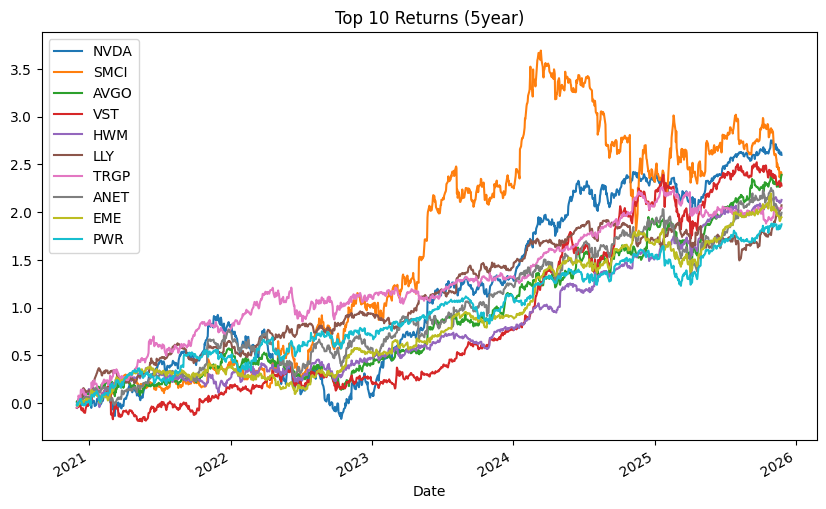

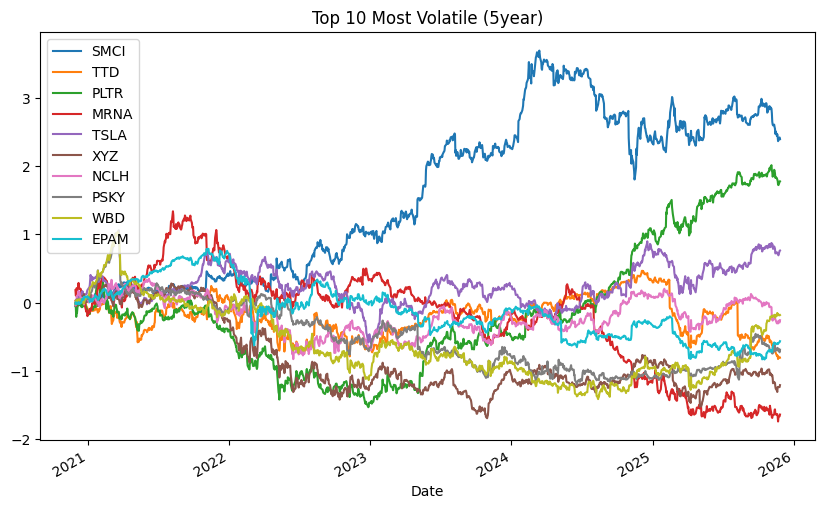

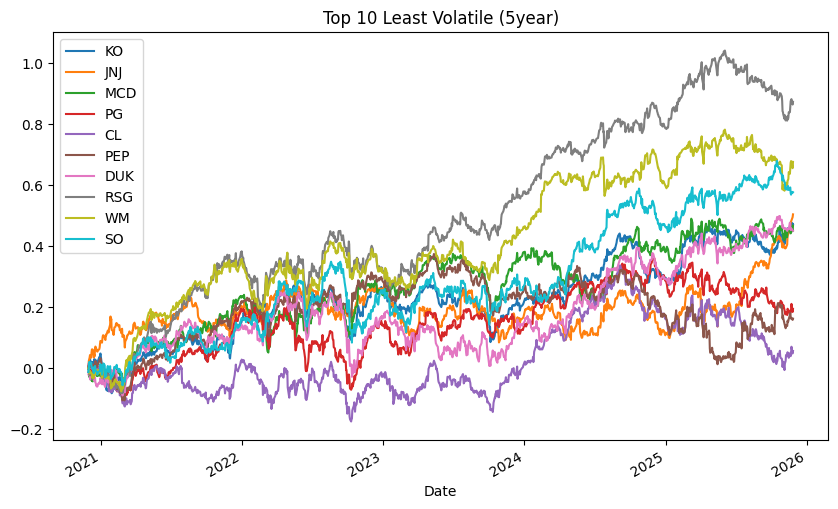

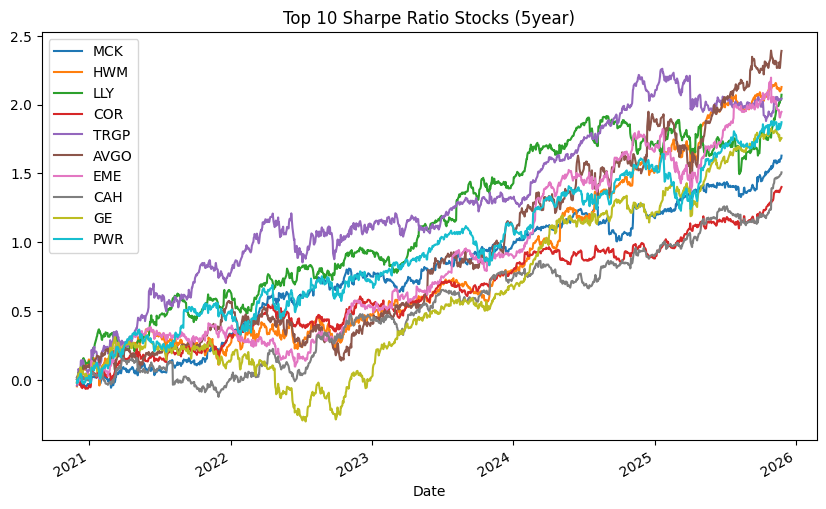

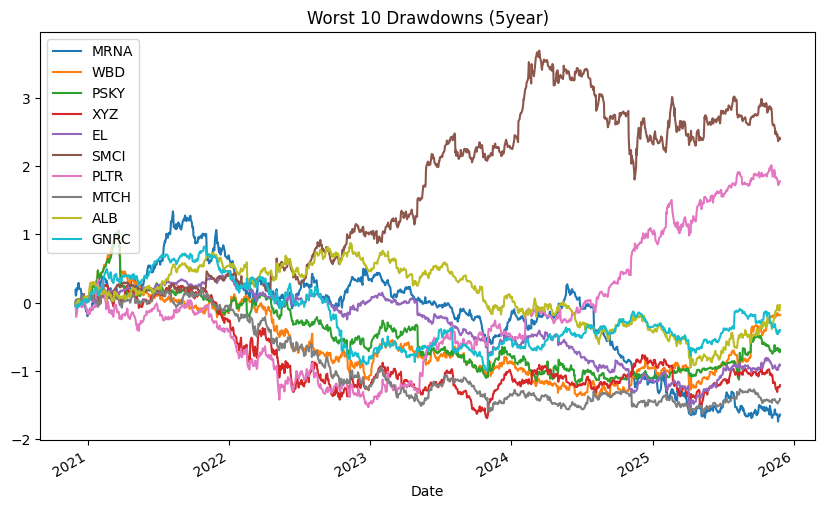

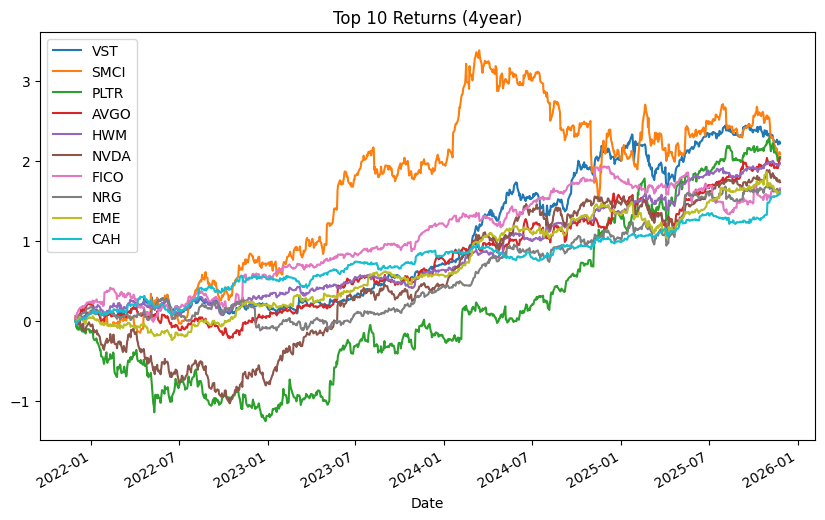

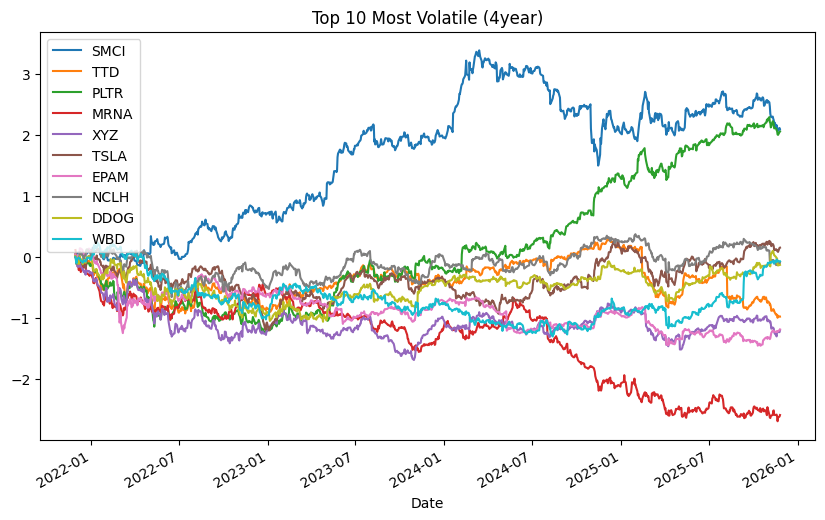

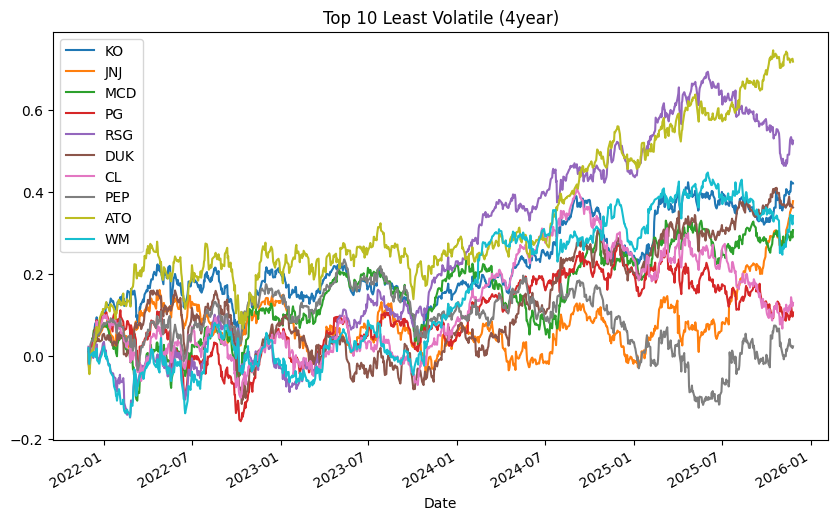

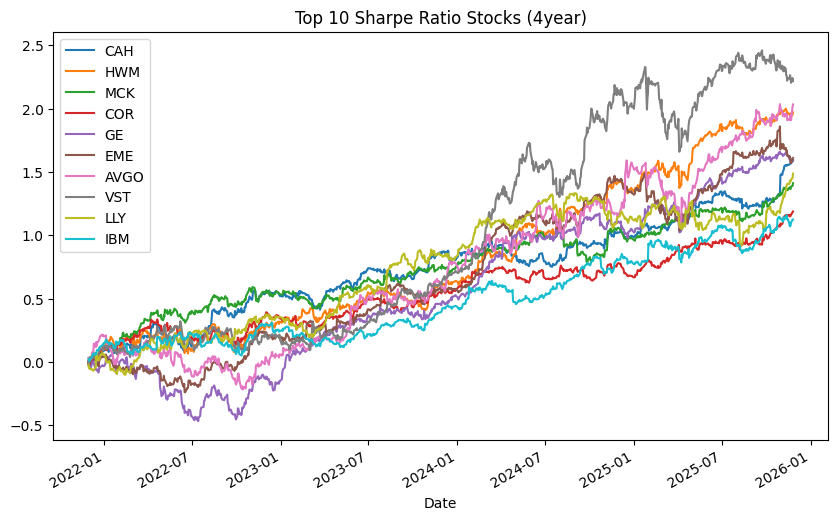

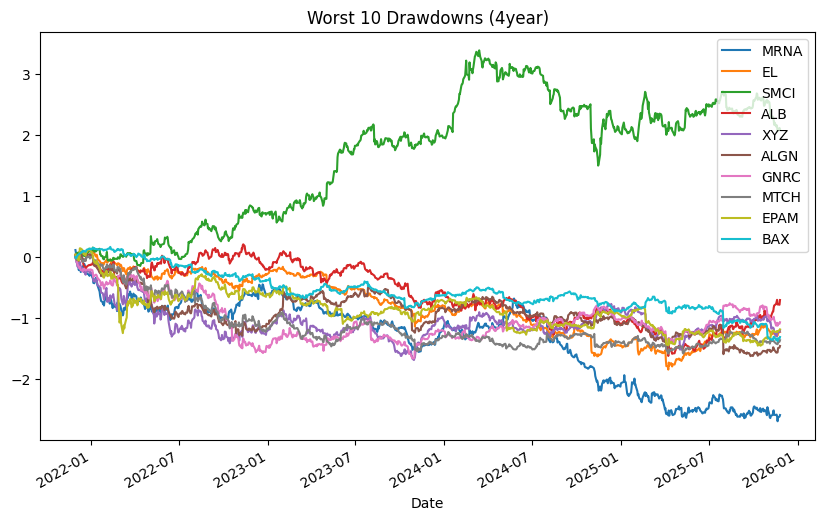

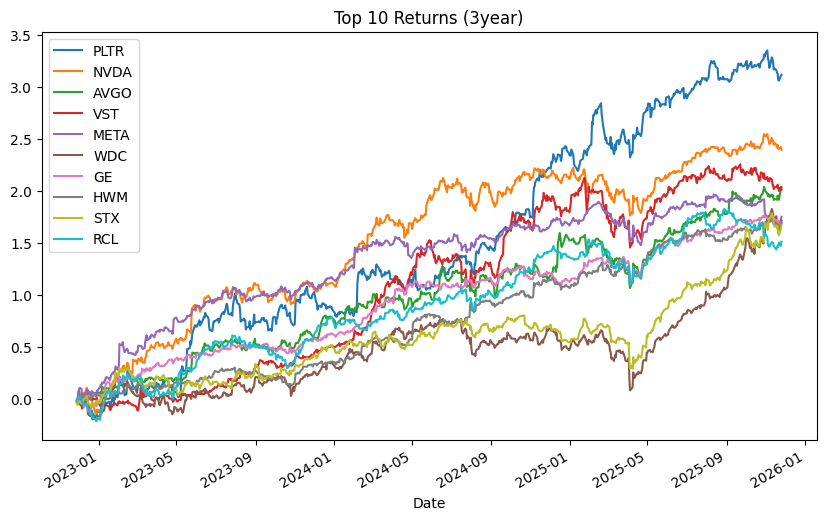

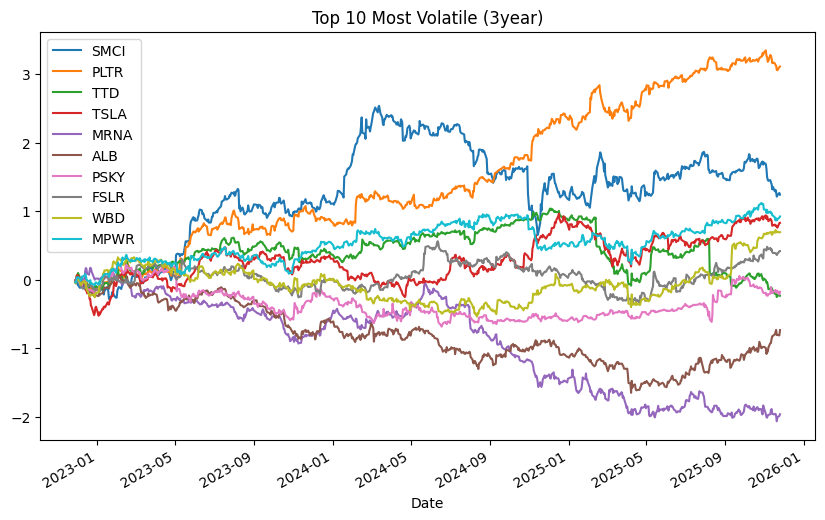

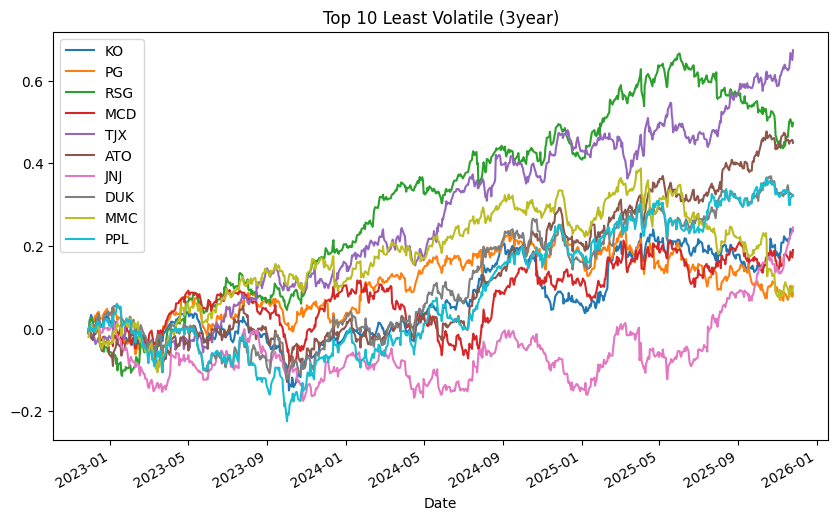

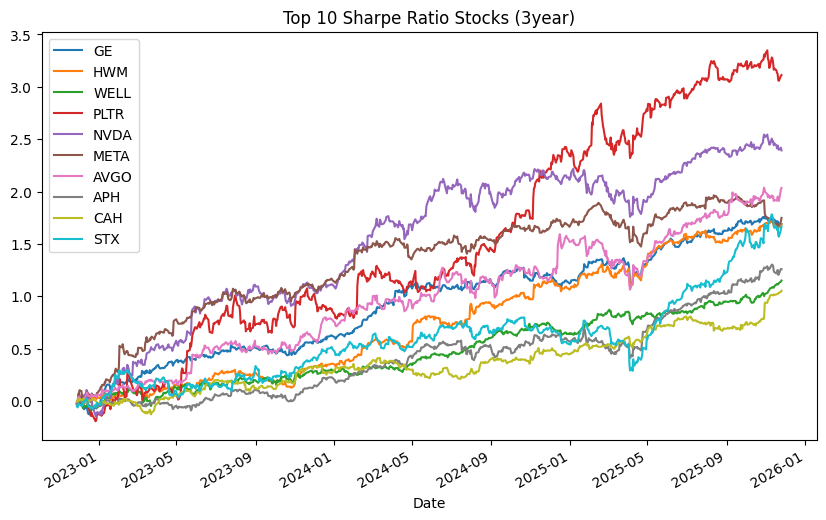

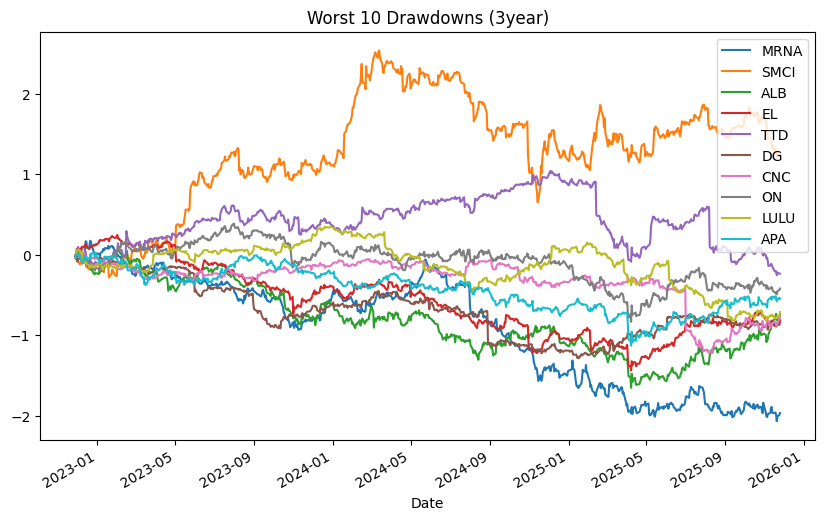

In [32]:
for label, subset_df in subsets.items():
    
    if label in ['5year', '4year', '3year']:
        print(f"\nRunning EDA for {label} ({subset_df.shape[0]} trading days)")
        stock_analysis_plots(subset_df, label=label)